
**Linear Regression Case Study**  

In [ ]:
import pandas as pd  # importing pandas for reading the data
# importing matplotlib and seaborn for Data visualization of the dataset given
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('carprices.csv') # Reading the Dataset into the dataframe 'df'
df.head()  # Displaying the first 5 rows of the Dataset

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [ ]:
df.describe() #Describe functions calculates the mean, count, quartiles and min-max values of the given dataset

,Mileage,Age(yrs),Sell Price($)
count,20.000000,20.000000,20.000000
mean,59736.500000,5.150000,25197.500000
std,20595.441825,1.785173,7834.479713
min,22500.000000,2.000000,12000.000000
25%,50500.000000,4.000000,19375.000000
50%,59000.000000,5.000000,26050.000000
75%,73750.000000,6.250000,31625.000000
max,91000.000000,8.000000,40000.000000


In [ ]:
df.shape # shape function given the shape of the data in (row,col) form.

(20, 3)

 
Data Cleaning - Data cleaning is important step before training the dataset as it removes the unneccessary details and records from the data which might lead to wrong predictions

In [ ]:
df.isnull().sum()*100/df.shape[0] # Checks if there is any null value or not in the dataset

Mileage          0.0
Age(yrs)         0.0
Sell Price($)    0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


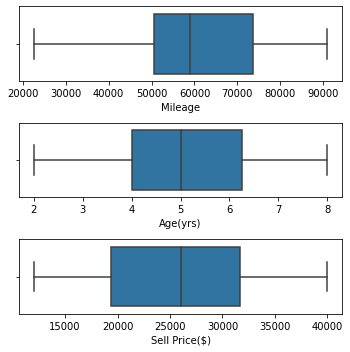

In [ ]:
# Plotting a box-plot for each column according to the data with the help of matplotlib package
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['Mileage'], ax = axs[0])
plt2 = sns.boxplot(df['Age(yrs)'], ax = axs[1])
plt3 = sns.boxplot(df['Sell Price($)'], ax = axs[2])
plt.tight_layout()

 
**CORRELATION BETWEEN TWO VARIABLES** 

In [ ]:
df.corr() # Compute pairwise correlation of columns, excluding NA/null values

,Mileage,Age(yrs),Sell Price($)
Mileage,1.000000,0.968290,-0.967173
Age(yrs),0.968290,1.000000,-0.941522
Sell Price($),-0.967173,-0.941522,1.000000


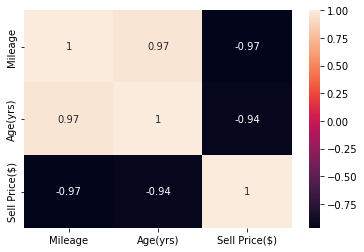

In [ ]:
sns.heatmap(df.corr(),annot=True) # Plotts a heatmap for showing the correlation 

**Plotting a scatter-plot between Mileage (Independent) and Sell Price (dependent variable)**

 
**Plotting a scatter-plot between Age(yrs) (Independent) and Sell Price (dependent variable)**

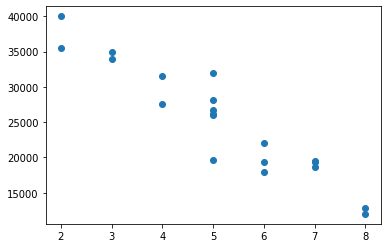

In [ ]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

In [ ]:
x=df[['Mileage','Age(yrs)']]
y=df['Sell Price($)']
print("x ->",x.shape)
print("y ->",y.shape)

x -> (20, 2)
y -> (20,)


Importing the train_test_split model from sklearn. It splits the data for training and testing.
test_size = 0.3 means 30% data from the dataset is used for testing and the rest 70% will be used for training the model

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3) 
print("x train->",xtrain.shape)
print("x test->",xtest.shape)

x train-> (14, 2)
x test-> (6, 2)


From sklearn we import the LinearRegression module and passed the xtrain and ytrain in the fit function for training the dataset and finding the best fit for the model

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()


**Testing the data**

In [ ]:
reg.predict(xtest) #After training we predict the value of ytest by giving xtest as input to our model

array([22208.39770081, 27741.76613602, 25524.76925748, 34691.22308916,
       17625.17078497, 37690.88080604])

In [ ]:
ytest 

9     22000
19    28200
5     26750
1     34000
11    19500
16    35500
Name: Sell Price($), dtype: int64


Calculating the error in the prediction by comparing with the Actual Output 

In [ ]:
comparision=pd.DataFrame({"predicted":reg.predict(xtest),'Actual':ytest}) 
comparision['error']=comparision['predicted']-comparision['Actual']
comparision

,predicted,Actual,error
9,22208.397701,22000,208.397701
19,27741.766136,28200,-458.233864
5,25524.769257,26750,-1225.230743
1,34691.223089,34000,691.223089
11,17625.170785,19500,-1874.829215
16,37690.880806,35500,2190.880806


**Calculating the Accuracy of the model**

In [ ]:
reg.score(xtest,ytest)

0.9476304776770348

As the accuracy comes out to be 0.9476 approx that means our model is 94.76 percent accurate 